___

<div>
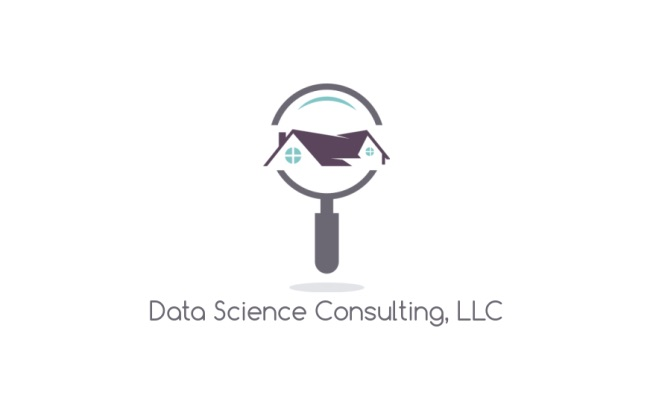
</div>

___

# Regression Analysis

## By: Dionne L. Taylor
## Cohort: O'Neil



## Project Description 
### Regression Project: Estimating Home Value
#### Summarize the findings and insights from the data exploration, modeling, and evaluation steps. Present the results to stakeholders, highlighting how the model meets their requirements and expectations.




## Regression Project Plan


#### 1. Data Acquisition

#### 2. Hypothesis Testing

#### 3. Data Validation & Quality Assurance

#### 4. Data Exploration

#### 5. Feature Engineering

#### 6. Model Selection

#### 7. Model Evaluation

#### 8. Model Intepretations

#### 8. Model Validation

#### 10. Recommendations


## Reproduction Steps

#### 1. Obtain dataset from MySqL database or saved csv. Dataset iincludes joins from properties_2017, predictions_2017, and propertylandusetype tables.

#### 2. Load the zillow dataset into a Jupyter Notebook or other development environment.

#### 3. Perform data cleaning and exploratory data analysis to gain insights into the zillow dataset.

#### 4. Build and test different machine learning models to predict assessed property value without using landtaxvaluedollarcnt, structuretaxvaluedollarcnt, and taxamount.

#### 5. Evaluate model performance using metrics.

#### 6. Recommend the best-performing model to predict assessed property value.

## Imports

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import wrangle
import env
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

## Data Dictionary

In [ ]:
wrangle.data_dict()

In [ ]:
wrangle.county_city_code_dict()

## Data Acquisition & Cleaning:
>Use SQL to filter the properties with transactions in 2017.
Join the properties_2017, predictions_2017, and propertylandusetype tables.Extract the required features ('square feet of the home', 'number of bedrooms', and 'number of bathrooms') and the target variable ('taxvaluedollarcnt').

In [ ]:
df = wrangle.get_zillow_data()

In [ ]:
df

In [19]:
df = wrangle.wrangle_zillow_data()

In [20]:
df

,total_sqft,ensuite_bathrooms,num_rooms,year_built,num_full_baths,lot_sqft,assessed_property_value
33718,1404,2.0,7.0,1962,2.0,7500,223557.0
1210,1758,2.0,0.0,1956,2.0,9090,347615.0
4999,1832,2.0,0.0,1964,2.0,5086,587000.0
23890,1270,2.0,0.0,1964,2.0,7884,174787.0
3480,1314,2.0,6.0,1955,2.0,7416,343277.0
...,...,...,...,...,...,...,...
1092,1323,2.0,6.0,1964,2.0,6825,453000.0
42128,1168,2.0,0.0,1953,2.0,7346,220704.0
15801,1277,2.0,0.0,1950,2.0,7741,280002.0
39333,1218,2.0,0.0,1944,2.0,5999,466671.0


## Hypothesis:

H$_0$: There is no linear relationship between total_sqft and assessed_property_value

H$_a$: There is linear relationship between total_sqft and assessed_property_value

In [21]:
wrangle.feature_correlation(df)

Feature: total_sqft
Pearson correlation coefficient: 0.15393939325314956
P-value: 7.639073970857993e-75


Spearman correlation coefficient: 0.14901814140252193
P-value: 3.3608523362765905e-70
Reject the null hypothesis (H0): There is a linear relationship'.


Feature: ensuite_bathrooms
Pearson correlation coefficient: nan
P-value: nan


Spearman correlation coefficient: nan
P-value: nan
Fail to reject the null hypothesis (H0): There is no evidence of a linear relationship'.


Feature: num_rooms
Pearson correlation coefficient: 0.07261560081915432
P-value: 8.37857763308814e-18


Spearman correlation coefficient: 0.07792604675227277
P-value: 2.845047817515245e-20
Reject the null hypothesis (H0): There is a linear relationship'.


Feature: year_built
Pearson correlation coefficient: 0.022057484787797545
P-value: 0.009122129567619775


Spearman correlation coefficient: 0.034562177055926846
P-value: 4.381900961250537e-05
Reject the null hypothesis (H0): There is a linear relationship'.


Fe

## Data Validation & Quality Assurance:
> Check the data types and missing values.
Validate the data by cross-referencing it with the source or any documentation available.
> Use cross-validation to evaluate the performance of different regression models on your dataset.

In [22]:
wrangle.summarize_data(df)

,dtypes,missing_values,unique_values,count,mean,std,min,25%,50%,75%,max
0,int64,0,1235,13973,1487.092178,262.920780,774.0,1281.0,1458.0,1657.0,2220.0
1,float64,0,1,13973,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
2,float64,0,10,13973,2.093323,3.061918,0.0,0.0,0.0,6.0,10.0
3,int64,0,44,13973,1958.323696,9.345620,1937.0,1953.0,1957.0,1964.0,1980.0
4,float64,0,1,13973,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
5,int64,0,4288,13973,6771.122594,1216.598988,3660.0,5998.0,6653.0,7559.0,9900.0
6,float64,0,11433,13973,317122.783296,199415.975412,26660.0,129431.0,305479.0,451461.0,925000.0


In [5]:
wrangle.cv_evaluation(df)

Linear Regression: Avg. RMSE: 197198.8817, Std. Dev: 2675.0595
Lasso: Avg. RMSE: 197198.8837, Std. Dev: 2675.0091
Ridge: Avg. RMSE: 197198.8633, Std. Dev: 2674.9923
ElasticNet: Avg. RMSE: 197524.5291, Std. Dev: 2543.9653
Decision Tree: Avg. RMSE: 275519.9332, Std. Dev: 2864.7046
Random Forest: Avg. RMSE: 206163.6975, Std. Dev: 2009.2500
Gradient Boosting: Avg. RMSE: 196379.0651, Std. Dev: 2234.3062
XGBoost: Avg. RMSE: 205649.9115, Std. Dev: 1690.8881


## Data Exploration:
>Explore the distributions and relationships between the features and the target variable.
Identify any potential outliers or anomalies.

In [6]:
wrangle.check_feature_importance(df)

total_sqft: 116.10196662928288
ensuite_bathrooms: 5.114464407540709e-12
num_rooms: 4251.545426239045
year_built: -586.639701314087
num_full_baths: 0.0
lot_sqft: -3.2394504427399258


In [7]:
wrangle.feature_elimination(df, n_features_to_select=3)

Selected columns: Index(['total_sqft', 'num_rooms', 'year_built'], dtype='object')


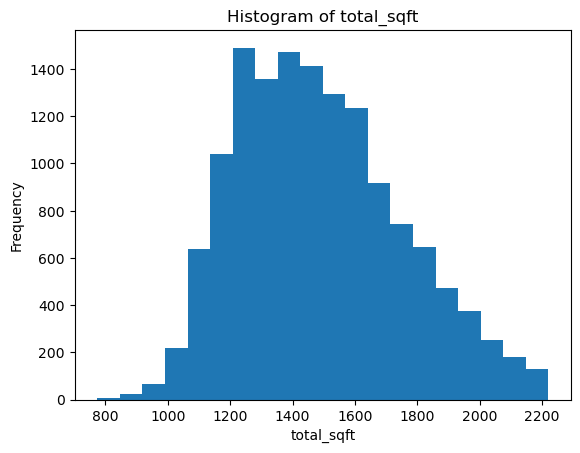

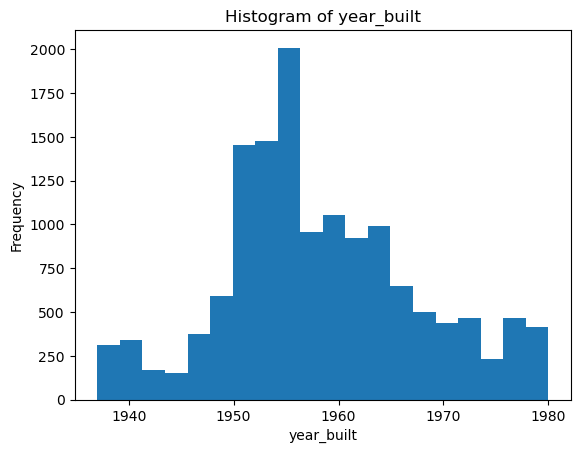

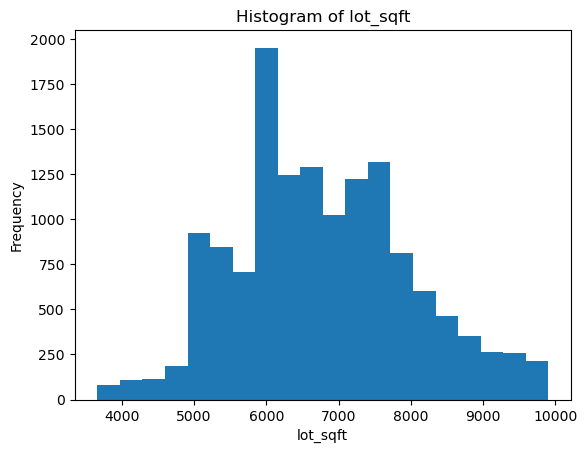

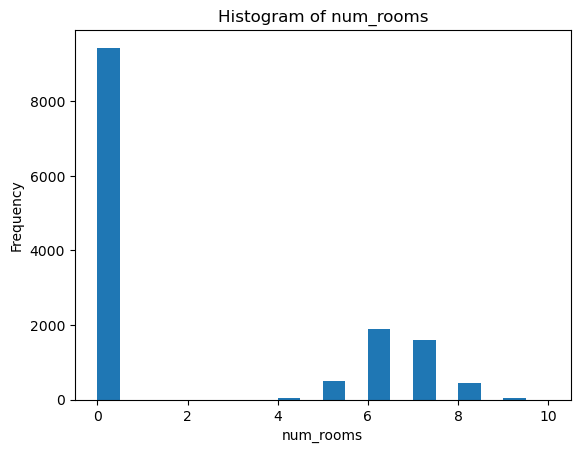

In [8]:
wrangle.hist_frequency_chart(df, continuous_vars=['total_sqft', 'year_built', 'lot_sqft', 'num_rooms'])

## Feature Engineering:
> Handle missing values using appropriate techniques (imputation, dropping, etc.).
Encode categorical variables if needed.
Remove any features that leak information about the target variable.

In [9]:
wrangle.get_stats(df, 'assessed_property_value')

                               OLS Regression Results                              
Dep. Variable:     assessed_property_value   R-squared:                       0.027
Model:                                 OLS   Adj. R-squared:                  0.027
Method:                      Least Squares   F-statistic:                     98.52
Date:                     Mon, 10 Apr 2023   Prob (F-statistic):           7.89e-83
Time:                             18:43:21   Log-Likelihood:            -1.9015e+05
No. Observations:                    13973   AIC:                         3.803e+05
Df Residuals:                        13968   BIC:                         3.803e+05
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Model Selection:
> Split the data into train, validation, and test sets.
Test different regression models (e.g., linear regression, decision tree, random forest, etc.) on the training set to identify the best performing model.

In [10]:
wrangle.model_selection(df, 'assessed_property_value')

Linear Regression: Mean Squared Error = 38700566928.7758, R^2 Score = 0.0265
Lasso: Mean Squared Error = 38700566930.6747, R^2 Score = 0.0265
Ridge: Mean Squared Error = 38700566820.8018, R^2 Score = 0.0265
ElasticNet: Mean Squared Error = 38700552031.0516, R^2 Score = 0.0265
Decision Tree: Mean Squared Error = 76403282771.9807, R^2 Score = -0.9336
Random Forest: Mean Squared Error = 42173597055.7862, R^2 Score = -0.0598
Gradient Boosting: Mean Squared Error = 38131201516.2395, R^2 Score = 0.0407
XGBoost: Mean Squared Error = 41207239123.5403, R^2 Score = -0.0369


## Model Evaluation:
> Evaluate the selected model on the validation set using appropriate metrics (e.g., mean squared error, R-squared, etc.).

In [11]:
wrangle.model_eval(df, 'assessed_property_value')

Best Model: ElasticNet, R^2 score: 0.021
P>|t| for total_sqft: 0.000
P>|t| for ensuite_bathrooms: nan
P>|t| for num_rooms: 0.000
P>|t| for year_built: 0.000
P>|t| for num_full_baths: nan
P>|t| for lot_sqft: 0.000


## Model Interpretation:
> Investigate the importance of individual features in the final model.
Gain insights into the relationships between the features and the target variable.

In [12]:
best_params = {
    'n_estimators': 200,
    'max_depth': 30,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'bootstrap': True
    }

In [13]:
wrangle.model_interpretation(df, 'assessed_property_value', best_params)

             feature  importance
5           lot_sqft    0.396348
0         total_sqft    0.376118
3         year_built    0.187586
2          num_rooms    0.039949
1  ensuite_bathrooms    0.000000
4     num_full_baths    0.000000


##  Model Validation:
> Test the final model on the test set to assess its performance on unseen data.

In [14]:
target_column = 'assessed_property_value'
wrangle.model_validation(df, target_column)

Best Model: Lasso, R^2 score: 0.021
P>|t| for total_sqft: 0.000
P>|t| for ensuite_bathrooms: nan
P>|t| for num_rooms: 0.000
P>|t| for year_built: 0.000
P>|t| for num_full_baths: nan
P>|t| for lot_sqft: 0.000


In [15]:
target_column = 'assessed_property_value'
wrangle.split_and_evaluate_ols(df, target_column)

Train R^2 Score: 0.029
Train Mean Squared Error: 38842719153.191
Validation R^2 Score: 0.021
Validation Mean Squared Error: 37031093812.912
Test R^2 Score: 0.021
Test Mean Squared Error: 39591040279.459
Difference in R^2 Scores:
Train-Validation: 0.008
Train-Test: 0.008
Validation-Test: 0.000


## Conclusion, Thanks for your time and attention!